# OZAN MUJDE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics # for using harmonic mean
import re


In [2]:
def readTxt(filename):
    """
    Read the txt file with utf-8 encoding then remove every non-english character then lowercase the data and save 
    every unique word in a list.
    """
    with open(filename, 'r', encoding='utf-8') as f:
        data = f.read()
        # data = re.sub(r'[^\w\s]', '', data)
        # data = data.lower()
       
        data = re.sub("[^a-zA-Z \n]+", "",data)
        data = data.lower()
        data = data.split()
        return data
        # data = list(set(data))
        # data = list(data)
        return data

    

In [3]:
len(readTxt('../test_dosyasi_2.txt'))

1885

In [4]:
train_array_len = len(readTxt('../filtrelenecek_kelimeler_2.txt'))
train_array_len


2629

In [5]:
test_array_len = len(readTxt('../test_dosyasi_2.txt'))
test_array_len

1885

### HASH fonksiyonlarini kisaca aciklama
 * Hocam oncelikle murmur fvn falan cok zor geldi, direkt kutuphane kullanma olsa kullanirdim ama implementasyon  zor gibiydi o yuzden onlari yapmadim.
 * Ardindan internette flajolet de ve bloom da iyi olan hashleri aradim flajolet de internette murmur3 ve bir adet de int bazli hash den bahsediyorlardi o yuzden onu gecip blooma geldim
 * Bloom filter da alttaki linkde gorebileceginiz cogu hash fonksiyonunu denedim bu 2 li guzel gibi geldi ama  diger hash'ler sanki pek de iyi sonuc vermiyor gibiydi tabii ki overfite varacak duzeyde hash'lerle oynanabilir ozellikle 2. soruda hashler asiri deger degistiriyordu ama overfit gibi olacagindan bunu yapmak istemedim.
 * DJB hashi Professor Daniel J. Bernstein bulmus asiri efektif diyorlardi koydum gercektende oyle cikti
 * SDBM hashi genel olarak cogu datasetinde iyi deniliyordu o yuzden ekledim yine hakli ciktilar
 * Diger 3 hashi kendim yaptim Mehmet  hoca 212 de string hash'i anlatirken mesela boyle olabilir gibi bir ornek vermisti onu yaptim ustune bir de asal sayi ekleyin gibi bir sey diyordu stackOverFlow da o yuzden en son asal sayi ile ust aliyorum 

https://www.partow.net/programming/hashfunctions/#BloomFilters


In [6]:
def stringHashFunction1(data:str):
    """
    This function takes a string and returns a hash value
    DJB Hash Function    
    """
    # hash = 0
    # # print('hash3')
    # for i in range(len(data)):
    #     hash += ord(data[i]) * (i + 1) ** 31
    hash = 5381;
    i    = 0;
    for c in data:
        hash = ((hash << 5) + hash) + ord(c)
        i += 1
    return hash

In [7]:
def stringHashFunction2(data:str):
    """
    This function takes a string and returns a hash value
    SDBM Hash Function
    """
    hash = 0;
    i    = 0;

    for c in data:
       hash = ord(c) + (hash << 6) + (hash << 16) - hash;
    # hash = 
    # for i in range(len(data)):
    #     hash += ord(data[i]) * (i + 1) ** 7
    return hash

In [8]:
def stringHashFunction3(data:str):
    """
    This function takes a string and returns a hash value
    BKDR Hash Function
    """
    # seed = 131
    # hash   = 0
    # for c in data:
    #     hash = ( hash * seed )+ ord(c)
    hash = 0
    for i in range(len(data)):
        hash += ord(data[i]) * (i + 1) ** 11
    return hash

In [9]:
def stringHashFunction4(data:str):
    """
    This function takes a string and returns a hash value
    """
    hash = 0
    for i in range(len(data)):
        hash += ord(data[i]) * (i + 1) ** 13
    return hash

In [10]:
def stringHashFunction5(data:str):
    """
    This function takes a string and returns a hash value
    """
    # seed = 131
    # hash   = 0
    # for c in data:
    #     hash = ( hash * seed )+ ord(c)
    hash = 0
    for i in range(len(data)):
        hash += ord(data[i]) * (i + 1) ** 31
    return hash

In [11]:
HASH_FUNCTIONS = [stringHashFunction1, stringHashFunction2, stringHashFunction3,stringHashFunction4,stringHashFunction5]

In [12]:
def bloomFilter(fileName, k, m):
    """The bloomFilter constructor function that takes stringArr, number of hash functions betwwen 1-3, and size 
    of the bloom filter. It returns a bloom filter object 0 if element is not seen 1 if the element is seen in a hash
    function.

    Args:
        fileName: name of the file to be read
        k (int): number of the hash functions
        m (int): length of the bloom filter
        return (boolean arr): array of length m with True if the element is in the bloom filter and False if not
    """
    # initialize the bloom filter
    data = readTxt(fileName)
    # print(len(data))
    bloom = np.zeros(m)
    # insert the data into the bloom filter
    for datum in data:
        #Make bloom filter true for each individual hash function 
        for i in range(k):
            hash = HASH_FUNCTIONS[i](datum)
            bloom[hash % m] = True
    return bloom


In [13]:
def bloomFilterCheck(bloom, fileName, k):
    """The bloomFilterCheck function takes a bloom filter object,  a string and number of the hash functions that returns a boolean array of length 
    as same data with True if the element is in the bloom filter and False if not.

    Args:
        bloom (numpy arr): bloom filter object
        fileName: name of the file to be read
        k (int): number of the hash functions
        return (boolean arr): array of length m with True if the element is in the bloom filter and False if not
    """
    # initialize the boolean array
    data = readTxt(fileName)
    # print(len(data))
    boolArr = np.zeros(len(data))
    bloomFilterArray = []
    # check if the data is in the bloom filter
    for index,datum in enumerate(data):
        count = 0
        for i in range(k):
            # if the element is in the bloom filter, count is incremented
            # If the count is equal to the number of hash functions, the element is in the bloom filter
            hash = HASH_FUNCTIONS[i](datum)
            if bloom[hash % len(bloom)] == 1:
                count += 1
        if count == k:
            boolArr[index] = True
            bloomFilterArray.append(datum)
    with open('filtreye_takilanlar.txt', 'w') as f:
        for item in bloomFilterArray:
            f.write("%s\n" % item)
        # f.write(bloomFilterArray)
    print('Filtreye takilanlarin uzunlugu',len(bloomFilterArray))
    return boolArr, bloomFilterArray


In [14]:
bloom = bloomFilter('../filtrelenecek_kelimeler_2.txt', 3, 2183*16)

In [15]:
bloom

array([0., 0., 0., ..., 0., 0., 0.])

In [16]:
boolArr,_ = bloomFilterCheck(bloom, '../test_dosyasi_2.txt', 3)

Filtreye takilanlarin uzunlugu 916


In [17]:
boolArr

array([0., 0., 0., ..., 1., 0., 0.])

In [18]:
count  =0;
for i in boolArr:
    if i == True:
        count += 1
print(count,len(boolArr))

916 1885


In [19]:
realTestData = data = readTxt("../test_dosyasi_2.txt")
realTrainData = data = readTxt("../filtrelenecek_kelimeler_2.txt")
realBoolArr = np.zeros(len(realTestData))
for index,datum in enumerate(realTestData):
    if datum in realTrainData:
        realBoolArr[index] = True
realBoolArr


array([0., 0., 0., ..., 1., 0., 0.])

In [20]:
def findFalsePositiveRate(testArr, realArr,k,i):
    """
    This function takes two boolean arrays and returns the number of false positives.
    """
    count = 0
    for index,datum in enumerate(testArr):
        if datum == True and realArr[index] == False:
            count += 1
    print('Number of False Positive  for number of %s hash functions  and bit multiplier %s is %s' % (k,i, count))
    return count / len(testArr)

In [21]:
findFalsePositiveRate(boolArr, realBoolArr,3,2)

Number of False Positive  for number of 3 hash functions  and bit multiplier 2 is 2


0.0010610079575596816

In [22]:
def plotBloom(k):
    i = 2
    fprArr = []
    while i <=16 : 
        bloom = bloomFilter('../filtrelenecek_kelimeler_2.txt', k, train_array_len*i)
        boolArr,_ = bloomFilterCheck(bloom, '../test_dosyasi_2.txt', k)
        fpr = findFalsePositiveRate(boolArr, realBoolArr,k,i)
        fprArr.append([fpr,i])
        i = i*2
    return fprArr 

Filtreye takilanlarin uzunlugu 1316
Number of False Positive  for number of 1 hash functions  and bit multiplier 2 is 402
Filtreye takilanlarin uzunlugu 1127
Number of False Positive  for number of 1 hash functions  and bit multiplier 4 is 213
Filtreye takilanlarin uzunlugu 1021
Number of False Positive  for number of 1 hash functions  and bit multiplier 8 is 107
Filtreye takilanlarin uzunlugu 974
Number of False Positive  for number of 1 hash functions  and bit multiplier 16 is 60
Filtreye takilanlarin uzunlugu 1198
Number of False Positive  for number of 2 hash functions  and bit multiplier 2 is 284
Filtreye takilanlarin uzunlugu 1020
Number of False Positive  for number of 2 hash functions  and bit multiplier 4 is 106
Filtreye takilanlarin uzunlugu 948
Number of False Positive  for number of 2 hash functions  and bit multiplier 8 is 34
Filtreye takilanlarin uzunlugu 925
Number of False Positive  for number of 2 hash functions  and bit multiplier 16 is 11
Filtreye takilanlarin uzunlu

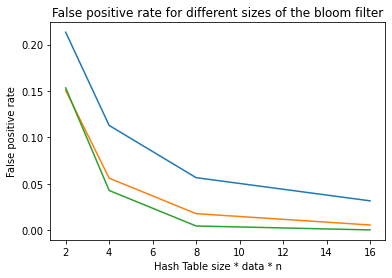

In [23]:
for i in range(3):
    fprArr = plotBloom(i+1)
    fprNp = np.array(fprArr)
    fprNp[:,1]
    #Plot the false positive rate for different sizes of the bloom filter
    plt.plot(fprNp[:,1],fprNp[:,0])
# plt.legend(['False positive rate'])
plt.xlabel('Hash Table size * data * n')
plt.ylabel('False positive rate')
plt.title('False positive rate for different sizes of the bloom filter')
plt.show()


### Problem 1 Aciklama
Veriyi regex ile istenilen formata getirdikten sonra 2 adet veri ile 2 farkli islem yapmaktayiz

Ilk adim Bloom Filter'i olusturma
 * Bloom filter'i olustururken bloom filter'in calisma mantigindan dolayi genelde n adet veri icin n*k lik bir boolean array acariz bu actigimiz boolean arrayi yardimi ile 2000 adet string tutmak yerine bir kac bin boolean tutabiliriz bu hafiza sikintisini ciddi bir miktarda cozer.
 * Ardindan bu olusturdugumuz array uzerinde genelde bu arrayin boyutuyla orantili artacak sekilde sectigimiz hash fonksiyonlarini kullanmaya baslariz.
 * Tum verinin (train verisi olmasada benzetilebilir) uzerinden bir defa gececek sekilde sirayla verinin her elemani k adet hash fonksiyonuna sokulur ve sonuclarinin indexi bitArrayi uzerinden 1 yapilir
 * Zaten True ya da 1 yapilan indexlere bir daha dokunulmaz 
 * Olusturulan bloomFilter boolean bit arrayi return edilir

Ikinci adim bir veriyi Bloom Filter uzerinden test etmek
 * Bir verinin bu listede ya da Bloom Filter da bulunmasi demek o veri icin calistirilan (Onceki asamayla ayni olmak sarti ile) hash fonksiyonlarinin sonuclarinin HER BIRININ dondugu indexin bloomFilter'imizda da True ya da 1 olmasi gerekir.
 * Veriler sirasi ile bu hash fonk. sokulur ardindan her fonk sonucu 1 ise filter'dadir degilse gecebilir deriz.
 * Bu method eger HashSet tarzi bir set kullanilmayacaksa cok ciddi bir hiz artisi da saglayacaktir.

 Veri zaten filtredeyse kesinlikle o hash sonuclari 1 donmektedir bu yuzden False Negativ olamaz. Goruldugu uzere de dogru hash table size'lari secilirse False Pozitiv oranlari da cogu durumda goz ardi edilebilir bir seviyeye cekilir   



## PROBLEM 2

In [24]:
def readDistinctTxt(fileName):
    """
    This function takes a file name and returns a list of distinct words.
    """
    with open(fileName, 'r', encoding='utf-8') as f:
        data = f.read()
        data = re.sub("[^a-zA-Z \n]+", "",data)
        data = data.lower()
        data = data.split()
        data = list(set(data))
        return data

### Flajolet Aciklama
 Hocam burada algoritma aciklamasi yerine yaptigim bazi ekstra vs seyleri aciklayacagim
 * Oncelikle Flajolet den cikacagini dusundugum icin odev de belirtmis olsanizda Hyperloglog'a girmedim onun yerine farkli hash'leri kombine ettim
 * Xor derste de bahsettigim gibi degerlerin Xor'unu aliyor
 * Harmonic ortalamanin mean'le beraber iyi sonuc verdigini okumustum o yuzden onu da ekledim ekstradan sadece onda kullandigim bir import islemim var
 * Combo dedigim ise tum harmonic haric tum islemlerin ortalamasinin alinmasi bunun sebebi harmonic ile mean'in zaten benzemesi ama mean'in bir tik daha guvenilir sonuclar vermesi belki tam tersidir tam emin degilim 
 * Bu yuzden combo'da xor mean ve median'in ortalamasini aliyorum
 * / 0.77351 islemini derste degindiginiz ve wikipedia da oldugu icin ekledim 

### 2 adet Flajolet implementasyonu 
Hocam ben 2 adet farkli ama benzer implementasyonlar yaptim bunlardan su an comment'e alinmamis olan bir tik daha kotu calissa dahi genel olarak algoritma boyle oldugu icin acik biraktim isterseniz bir methodu kapayip digerini acarak vs test edebilirsiniz
 * Ilk method da once her hash icin maxNumber bulunuyor  O(k*n) constant zaman hala korunmakta ardindna bu maxNumber'lar arasindan mean vs islem yapiliyor
 * Ikinci method da ise bir veri icin k adet hash degeri aliniyor ardindan tek tek her adimda bu hash degerlerinin mean'i vs alinip bu degerin en buyuk degeri aliniyor.Buradan donulen sayi direkt olarak cevap diyebiliriz. Bu algoritmadan biraz cikiyor ama boyle de iyi sonuc aldigim icin bunu boyle birakiyorum.

In [25]:
def FlajoletMartin(fileName,k,mode):
    """
    This function is implementing the FlajoletMartin algorithm. It takes a file name, number of hash functions and a mode.
    It returns the number of distinct elements in the file.
    """
    
    data = readTxt(fileName)
    valArr = []
    for i in range(k):
        maxNum=0
        for index,datum in enumerate(data):
            sum=0
            hash = HASH_FUNCTIONS[i](datum)
            val = bin(hash % len(data))[2:]
            for j in range(len(val)-1,0,-1):
                if val[j]=='0':
                    sum+=1
                else:
                    break
            if sum>maxNum:
                maxNum=sum
        valArr.append(2 ** maxNum)
            # val = hash % len(data)
    # print(valArr)
    if mode == 'mean':
        # count = 0 
        # for i in valArr:
        #     count += i
        # val = count // len(valArr)
        val = np.mean(valArr)
    if mode == 'xor':
        firstRun = True
        for i in valArr:
            if firstRun:
                val = i
                firstRun = False
            else:
                val ^=  i
    if mode == 'median':
        val = np.median(valArr)
    elif mode == 'combo':
        val1 = np.mean(valArr)
        val2 = np.median(valArr)
        firstRun = True
        for i in valArr:
            if firstRun:
                val3 = i
                firstRun = False
            else:
                val3 ^=  i
        val4 = int(statistics.harmonic_mean(valArr))
        # val = int(val1) ^ int(val2) ^ int(val3) ^ val4
            # val = int(np.mean([val1,val4]))
        val = int(np.mean([val1,val2,val3]))
    elif mode == 'harmonic':
        val = statistics.harmonic_mean(valArr)
        # print(val)
    return val   
        
# def FlajoletMartin(fileName,k,mode):
#     """
#     This function is implementing the FlajoletMartin algorithm. It takes a file name, number of hash functions and a mode.
#     It returns the number of distinct elements in the file.
#     """
#     maxNum=0
#     data = readTxt(fileName)
#     for index,datum in enumerate(data):
#         valArr = []
#         for i in range(k):
#             hash = HASH_FUNCTIONS[i](datum)
#             # val = bin(hash % len(data))[2:]
#             tmpVal = hash % len(data)
#             valArr.append(tmpVal)
#             sum=0
#             # val = hash % len(data)
#         # print(valArr)
#         if mode == 'mean':
#             # count = 0 
#             # for i in valArr:
#             #     count += i
#             # val = count // len(valArr)
#             val = int(np.mean(valArr))
#         if mode == 'xor':
#             firstRun = True
#             for i in valArr:
#                 if firstRun:
#                     val = i
#                     firstRun = False
#                 else:
#                     val ^=  i
#         if mode == 'median':
#             val = int(np.median(valArr))
#         elif mode == 'combo':
#             val1 = int(np.mean(valArr))
#             val2 = int(np.median(valArr))
#             firstRun = True
#             for i in valArr:
#                 if firstRun:
#                     val3 = i
#                     firstRun = False
#                 else:
#                     val3 ^=  i
#             val4 = int(statistics.harmonic_mean(valArr))
#             val = int(statistics.harmonic_mean([val1,val2,val3,val4]))
#             # val = int(np.mean([val1,val4]))
#             # val = int(np.mean([val1,val2,val3]))
#         elif mode == 'harmonic':
#             val = int(statistics.harmonic_mean(valArr))
#         # print(val)
#         val = bin(val)[2:]
#         for j in range(len(val)-1,0,-1):
#             if val[j]=='0':
#                 sum+=1
#             else:
#                 break
#         if sum>maxNum:
#             maxNum=sum
#     return 2**maxNum   
        

    

In [26]:
esperanto = readDistinctTxt('../Esperanto-Lipsum.txt')
esperantoTotal= readTxt('../Esperanto-Lipsum.txt')
print('%s distinct element and %s total element on File Esperanto-Lipsum.txt'% (len(esperanto),len(esperantoTotal)))
for i in range(5):
    maxNum =FlajoletMartin('../Esperanto-Lipsum.txt',i+1,'xor')
    print('distict elements Xor for', i+1 ,'hash', (maxNum) / 0.77351)
    maxNum =FlajoletMartin('../Esperanto-Lipsum.txt',i+1,'mean')
    print('distict elements MEAN for',i+1 ,'hash', (maxNum) / 0.77351)
    maxNum =FlajoletMartin('../Esperanto-Lipsum.txt',i+1,'median')
    print('distict elements MEDIAN for',i+1 ,'hash', (maxNum) / 0.77351)
    maxNum =FlajoletMartin('../Esperanto-Lipsum.txt',i+1,'combo')
    print('distict elements COMBO for',i+1 ,'hash', (maxNum) / 0.77351)
    maxNum =FlajoletMartin('../Esperanto-Lipsum.txt',i+1,'harmonic')
    print('distict elements HARMONIC for',i+1 ,'hash', (maxNum) / 0.77351)
    print('==========================================================')

813 distinct element and 2000 total element on File Esperanto-Lipsum.txt
distict elements Xor for 1 hash 330.9588757740688
distict elements MEAN for 1 hash 330.9588757740688
distict elements MEDIAN for 1 hash 330.9588757740688
distict elements COMBO for 1 hash 330.9588757740688
distict elements HARMONIC for 1 hash 330.9588757740688
distict elements Xor for 2 hash 992.8766273222066
distict elements MEAN for 2 hash 496.4383136611033
distict elements MEDIAN for 2 hash 496.4383136611033
distict elements COMBO for 2 hash 661.9177515481376
distict elements HARMONIC for 2 hash 441.27850103209175
distict elements Xor for 3 hash 330.9588757740688
distict elements MEAN for 3 hash 551.5981262901148
distict elements MEDIAN for 3 hash 661.9177515481376
distict elements COMBO for 3 hash 514.5376271799977
distict elements HARMONIC for 3 hash 496.4383136611033
distict elements Xor for 4 hash 992.8766273222066
distict elements MEAN for 4 hash 579.1780326046205
distict elements MEDIAN for 4 hash 661.917

In [27]:
esperanto = readDistinctTxt('../Lorem_Ipsum_3000.txt')
esperantoTotal= readTxt('../Lorem_Ipsum_3000.txt')
print('%s distinct element and %s total element on File Lorem_Ipsum_3000.txt'% (len(esperanto),len(esperantoTotal)))
for i in range(5):
    maxNum = FlajoletMartin('../Lorem_Ipsum_3000.txt',i+1,'xor')
    print('distict elements XOR for',i+1 ,'hash', (maxNum)/ 0.77351)
    maxNum = FlajoletMartin('../Lorem_Ipsum_3000.txt',i+1,'mean')
    print('distict elements MEAN for',i+1 ,'hash', (maxNum)/ 0.77351)
    maxNum = FlajoletMartin('../Lorem_Ipsum_3000.txt',i+1,'median')
    print('distict elements MEDIAN for',i+1 ,'hash', (maxNum)/ 0.77351)
    maxNum =FlajoletMartin('../Lorem_Ipsum_3000.txt',i+1,'combo')
    print('distict elements COMBO for',i+1 ,'hash', (maxNum) / 0.77351)
    maxNum =FlajoletMartin('../Lorem_Ipsum_3000.txt',i+1,'harmonic')
    print('distict elements HARMONIC for',i+1 ,'hash', (maxNum) / 0.77351)
    print('==========================================================')

186 distinct element and 3000 total element on File Lorem_Ipsum_3000.txt
distict elements XOR for 1 hash 330.9588757740688
distict elements MEAN for 1 hash 330.9588757740688
distict elements MEDIAN for 1 hash 330.9588757740688
distict elements COMBO for 1 hash 330.9588757740688
distict elements HARMONIC for 1 hash 330.9588757740688
distict elements XOR for 2 hash 496.4383136611033
distict elements MEAN for 2 hash 248.21915683055164
distict elements MEDIAN for 2 hash 248.21915683055164
distict elements COMBO for 2 hash 330.9588757740688
distict elements HARMONIC for 2 hash 220.63925051604588
distict elements XOR for 3 hash 165.4794378870344
distict elements MEAN for 3 hash 275.7990631450574
distict elements MEDIAN for 3 hash 330.9588757740688
distict elements COMBO for 3 hash 257.26881358999884
distict elements HARMONIC for 3 hash 248.21915683055164
distict elements XOR for 4 hash 0.0
distict elements MEAN for 4 hash 248.21915683055164
distict elements MEDIAN for 4 hash 248.219156830551

In [28]:
esperanto = readDistinctTxt('../test_dosyasi.txt')
esperantoTotal= readTxt('../test_dosyasi.txt')
print('%s distinct element and %s total element on File test_dosyasi.txt'% (len(esperanto),len(esperantoTotal)))
for i in range(5):
    maxNum = FlajoletMartin('../test_dosyasi.txt',i+1,'xor')
    print('distict elements XOR for',i+1 ,'hash', (maxNum) / 0.77351)
    maxNum = FlajoletMartin('../test_dosyasi.txt',i+1,'mean')
    print('distict elements MEAN for',i+1 ,'hash', (maxNum) / 0.77351)
    maxNum = FlajoletMartin('../test_dosyasi.txt',i+1,'median')
    print('distict elements MEDIAN for',i+1 ,'hash', (maxNum) / 0.77351)
    maxNum =FlajoletMartin('../test_dosyasi.txt',i+1,'combo')
    print('distict elements COMBO for',i+1 ,'hash', (maxNum) / 0.77351)
    maxNum =FlajoletMartin('../test_dosyasi.txt',i+1,'harmonic')
    print('distict elements HARMONIC for',i+1 ,'hash', (maxNum) / 0.77351)
    print('==========================================================')


1431 distinct element and 3974 total element on File test_dosyasi.txt
distict elements XOR for 1 hash 661.9177515481376
distict elements MEAN for 1 hash 661.9177515481376
distict elements MEDIAN for 1 hash 661.9177515481376
distict elements COMBO for 1 hash 661.9177515481376
distict elements HARMONIC for 1 hash 661.9177515481376
distict elements XOR for 2 hash 3309.5887577406884
distict elements MEAN for 2 hash 1654.7943788703442
distict elements MEDIAN for 2 hash 1654.7943788703442
distict elements COMBO for 2 hash 2205.530633088131
distict elements HARMONIC for 2 hash 1059.0684024770203
distict elements XOR for 3 hash 3640.5476335147573
distict elements MEAN for 3 hash 1213.5158778382524
distict elements MEDIAN for 3 hash 661.9177515481376
distict elements COMBO for 3 hash 1838.373130276273
distict elements HARMONIC for 3 hash 611.0010014290502
distict elements XOR for 4 hash 2978.6298819666195
distict elements MEAN for 4 hash 1075.6163462657237
distict elements MEDIAN for 4 hash 661

In [29]:
esperanto = readDistinctTxt('../test_dosyasi_2.txt')
esperantoTotal= readTxt('../test_dosyasi_2.txt')
print('%s distinct element and %s total element on File test_dosyasi_2.txt'% (len(esperanto),len(esperantoTotal)))
for i in range(5):
    maxNum = FlajoletMartin('../test_dosyasi_2.txt',i+1,'xor')
    print('distict elements XOR for',i+1 ,'hash', (maxNum) / 0.77351)
    maxNum = FlajoletMartin('../test_dosyasi_2.txt',i+1,'mean')
    print('distict elements MEAN for',i+1 ,'hash', (maxNum) / 0.77351)
    maxNum = FlajoletMartin('../test_dosyasi_2.txt',i+1,'median')
    print('distict elements MEDIAN for',i+1 ,'hash', (maxNum) / 0.77351)
    maxNum =FlajoletMartin('../test_dosyasi_2.txt',i+1,'combo')
    print('distict elements COMBO for',i+1 ,'hash', (maxNum) / 0.77351)
    maxNum =FlajoletMartin('../test_dosyasi_2.txt',i+1,'harmonic')
    print('distict elements HARMONIC for',i+1 ,'hash', (maxNum) / 0.77351)
    print('==========================================================')

1430 distinct element and 1885 total element on File test_dosyasi_2.txt
distict elements XOR for 1 hash 661.9177515481376
distict elements MEAN for 1 hash 661.9177515481376
distict elements MEDIAN for 1 hash 661.9177515481376
distict elements COMBO for 1 hash 661.9177515481376
distict elements HARMONIC for 1 hash 661.9177515481376
distict elements XOR for 2 hash 1985.7532546444131
distict elements MEAN for 2 hash 992.8766273222066
distict elements MEDIAN for 2 hash 992.8766273222066
distict elements COMBO for 2 hash 1323.8355030962753
distict elements HARMONIC for 2 hash 882.5570020641835
distict elements XOR for 3 hash 2316.712130418482
distict elements MEAN for 3 hash 772.2373768061607
distict elements MEDIAN for 3 hash 661.9177515481376
distict elements COMBO for 3 hash 1250.1454409122055
distict elements HARMONIC for 3 hash 567.3580727555466
distict elements XOR for 4 hash 992.8766273222066
distict elements MEAN for 4 hash 910.1369083786893
distict elements MEDIAN for 4 hash 992.87